# **Handling the Imbalanced Data**

The natality to infant-fatality ratio is 1:228 in the data set project, a highly imbalanced data. We have seen that the prediction from the imbalanced data favors the majority class (birth natality); this is due to the fact that the loss functions in conventional algorithms do not take data distribution into consideration. In most of such cases, the classifier becomes irrelevant as the minority class (infant natality in this project) is the most important one to classify.Various undersampling and oversampling methods are used to deal will the the data imbalance inherent in the natality-infant fatality dataset.In this notebook, I used EditedNearestNeighborhood (ENN) to balance the data.

## **Undersampling using EditedNearestNeighborhood (ENN)**

In [1]:
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

### Load Data

In [2]:
Data_2008 = pd.read_pickle('CleanData_ML_final')

In [3]:
Data_2008.rename(columns=lambda x: x.strip(),inplace = True)

In [4]:
attribute_list = list(Data_2008.columns.str.strip()) #strip in case some of the column names have spaces around them.
print(attribute_list)

['AB_ANTI', 'AB_AVEN1', 'AB_AVEN6', 'AB_BINJ', 'AB_NICU', 'AB_SEIZ', 'AB_SURF', 'APGAR5', 'ATTEND', 'BFACIL', 'BRTHWGT', 'CA_ANEN', 'CA_CCHD', 'CA_CDH', 'CA_CLEFT', 'CA_CLPAL', 'CA_DISOR', 'CA_DOWN', 'CA_GAST', 'CA_HYPO', 'CA_LIMB', 'CA_MNSB', 'CA_OMPH', 'CIG_1', 'CIG_2', 'CIG_3', 'CIG_REC', 'COMBGEST', 'DMETH_REC', 'DPLURAL', 'ESTGEST', 'FAGECOMB', 'FBRACE', 'FLGND', 'FRACEHISP', 'LBO', 'LD_ANES', 'LD_ANTI', 'LD_AUGM', 'LD_CHOR', 'LD_FINT', 'LD_INDL', 'LD_MECS', 'LD_NVPR', 'LD_STER', 'MAGER', 'MAR', 'MBRACE', 'MEDUC', 'ME_ATTF', 'ME_ATTV', 'ME_PRES', 'ME_ROUT', 'ME_TRIAL', 'MRACEHISP', 'MRACEREC', 'ON_PRECIP', 'ON_PROL', 'ON_RUPTR', 'OP_CERV', 'OP_ECVF', 'OP_ECVS', 'OP_TOCOL', 'PRECARE', 'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'RF_CESARN', 'RF_DIAB', 'RF_ECLAM', 'RF_GEST', 'RF_GHYP', 'RF_PHYP', 'RF_PPOUTC', 'RF_PPTERM', 'SEX', 'TBO', 'UBFACIL', 'UCA_ANEN', 'UCA_CELFTLP', 'UCA_DOWNS', 'UCA_OMPHA', 'UCA_SPINA', 'UFHISP', 'ULD_BREECH', 'ULD_MECO', 'ULD_PRECIP', 'UME_FORCP', 'UME_VAC', 'UMH

In [5]:
len(attribute_list)

98

### Categorical, numerical, and binary features

Make a list of categorical, numerical, and binary features. The aim is to apply encode the categorical features. After data cleaning, there are 102 features and 1,569,762 records in total. Out of these, there are 25 categorical, 17 numerical, and 60 binary features.

In [6]:
categorical_attribute = ['ATTEND','BFACIL','DMETH_REC','FBRACE','FRACEHISP','MBRACE',
                         'ME_PRES','ME_ROUT','ME_TRIAL','MRACEHISP','MRACEREC','RDMETH_REC','RESTATUS',
                        'UBFACIL','UCA_ANEN','UCA_CELFTLP','UCA_DOWNS','UCA_OMPHA','UCA_SPINA',
                        'UFHISP','UMHISP']

In [7]:
numerical_attribute = ['APGAR5','BRTHWGT','CIG_1','CIG_2','CIG_3','COMBGEST','DPLURAL','ESTGEST','FAGECOMB','LBO','MAGER',
                      'MEDUC','PRECARE','RF_CESARN','TBO','UPREVIS','WTGAIN']

In [8]:
binary_attribute = ['AB_ANTI','AB_AVEN1','AB_AVEN6','AB_BINJ','AB_NICU','AB_SEIZ','AB_SURF','CA_ANEN','CA_CCHD',
                   'CA_CDH','CA_CLEFT','CA_CLPAL','CA_DISOR','CA_DOWN','CA_GAST','CA_HYPO','CA_LIMB','CA_MNSB',
                   'CA_OMPH','CIG_REC','FLGND','LD_ANES','LD_ANTI','LD_AUGM','LD_CHOR','LD_FINT','LD_INDL','LD_MECS',
                   'LD_NVPR','LD_STER','MAR','ME_ATTF','ME_ATTV','ON_PRECIP','ON_PROL','ON_RUPTR','OP_CERV',
                   'OP_ECVF','OP_ECVS','OP_TOCOL','RF_CESAR','RF_DIAB','RF_ECLAM','RF_GEST','RF_GHYP','RF_PHYP',
                   'RF_PPOUTC','RF_PPTERM','SEX','ULD_BREECH','ULD_MECO','ULD_PRECIP','UME_FORCP','UME_VAC',
                    'UOP_INDUC','UOP_TOCOL','URF_CHYPER','URF_DIAB','URF_ECLAM','URF_PHYPER']

Convert the numerical and binary features to float and int types respectively

In [9]:
for i in numerical_attribute:
    Data_2008['%s' % i] = Data_2008['%s' % i].astype(float)

In [10]:
for j in binary_attribute:
    Data_2008['%s' % j] = Data_2008['%s' % j].astype(int)

Encode the categorical features and assign a name to each new derived column 

In [11]:
df = pd.get_dummies(Data_2008, prefix=categorical_attribute, columns=categorical_attribute)
df.shape

(1569762, 192)

Lets look at the number of positive (death) and negative (natality) data size

In [12]:
Data_2008['FLGND'].value_counts()

0    1562931
1       6831
Name: FLGND, dtype: int64

In [13]:
df_features = list(df.columns)
df_features.remove('FLGND')

### Build Model

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from imblearn.datasets import make_imbalance
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

In [15]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [16]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.9,
                enn = EditedNearestNeighbours(random_state=0)):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    X_resampled, y_resampled = enn.fit_sample(X, y)
    print(sorted(Counter(y_resampled).items()))
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    y_score = clf.decision_function(Xtest)
    ytrain_score = clf.decision_function(Xtrain)
    test_average_precision = average_precision_score(ytest, y_score)
    train_average_precision = average_precision_score(ytrain, ytrain_score)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    print('Average test precision score: {0:0.2f}'.format(test_average_precision))
    print('Average train precision score: {0:0.2f}'.format(train_average_precision))
    return clf, Xtrain, ytrain, Xtest, ytest,y_score,ytrain_score

In [17]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l,yscore_1,ytrain_score_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1]}, 
                                                           df, df_features, 'FLGND',1)

[(0, 1552751), (1, 6831)]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


BEST PARAMS {'C': 0.1}
Accuracy on training data: 1.00
Accuracy on test data:     1.00
Average test precision score: 0.44
Average train precision score: 0.48


### Confusion matrix for test data

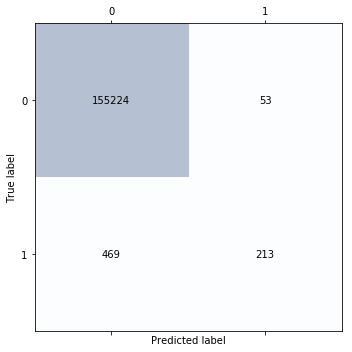

In [18]:
confmat_test = confusion_matrix(ytest_l, clf_l.predict(Xtest_l))
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat_test, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_test.shape[0]):
    for j in range(confmat_test.shape[1]):
        ax.text(x=j, y=i, s=confmat_test[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Lets look at the percentage of positive and negative observations in both training and test datasets.

In [19]:
SS_train = Xtrain_l.shape[0] 
SS_test = Xtest_l.shape[0]
PP_train = round(np.sum(ytrain_l)/SS_train,3)
NP_train = round(np.sum(ytrain_l == 0)/SS_train,3)
PP_test = round(np.sum(ytest_l)/SS_test,3)
NP_test = round(np.sum(ytest_l == 0)/SS_test,3)

In [20]:
TN_test, FP_test, FN_test, TP_test = confusion_matrix(ytest_l,clf_l.predict(Xtest_l)).ravel()

In [21]:
print(TN_test,TP_test,FP_test,FN_test)

155224 213 53 469


In [22]:

TPR_test = round(TP_test/(TP_test+FN_test),3) #true positive rate (Recall)

TNR_test = round(TN_test/(TN_test+FP_test),3) #true negative rate (Specifity)

PPV_test = round(TP_test/(TP_test+FP_test),3) #positive predictive value (Precision)

NPV_test = round(TN_test/(TN_test+FN_test),3) # Negative predictive value

FPR_test = round(FP_test/(FP_test+TN_test),3) # Fall out or false positive rate

FNR_test = round(FN_test/(TP_test+FN_test),3) # False negative rate

FDR_test = round(FP_test/(TP_test+FP_test),3) # False discovery rate

ACC_test = round((TP_test+TN_test)/(TP_test+FP_test+FN_test+TN_test),3) # Overall accuracy

In [23]:
print(classification_report(ytest_l, clf_l.predict(Xtest_l)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    155277
          1       0.80      0.31      0.45       682

avg / total       1.00      1.00      1.00    155959



**Precision-Recall Curve**

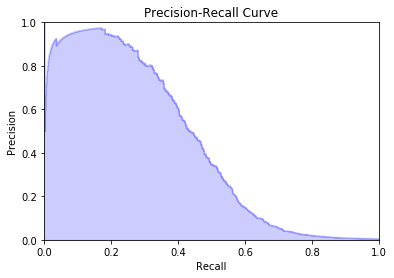

In [24]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(ytest_l, yscore_1)

plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')

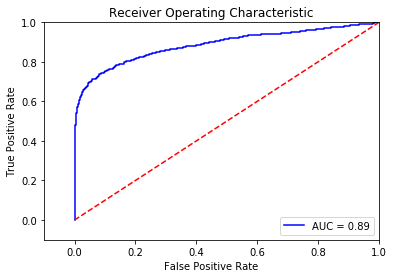

In [25]:
from sklearn.metrics import roc_curve, auc
fpr_test, tpr_test, _ = roc_curve(ytest_l, yscore_1)
roc_auc = auc(fpr_test, tpr_test)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Confusion matrix for training data

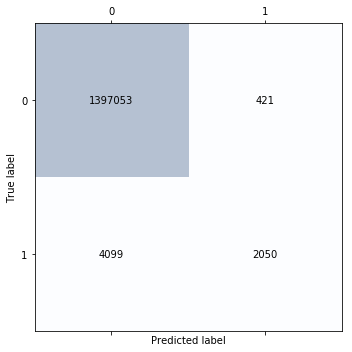

In [26]:
confmat_train = confusion_matrix(ytrain_l, clf_l.predict(Xtrain_l))
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat_train, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_train.shape[0]):
    for j in range(confmat_train.shape[1]):
        ax.text(x=j, y=i, s=confmat_train[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [27]:
TN_train,FP_train,FN_train,TP_train = confusion_matrix(ytrain_l,clf_l.predict(Xtrain_l)).ravel()

In [28]:
print(TN_train,TP_train,FP_train,FN_train)

1397053 2050 421 4099


In [29]:
TPR_train = round(TP_train/(TP_train+FN_train),3) #true positive rate (Recall)

TNR_train = round(TN_train/(TN_train+FP_train),3) #true negative rate (Specifity)

PPV_train = round(TP_train/(TP_train+FP_train),3) #positive predictive value (Precision)

NPV_train = round(TN_train/(TN_train+FN_train),3) # Negative predictive value

FPR_train = round(FP_train/(FP_train+TN_train),3) # Fall out or false positive rate

FNR_train = round(FN_train/(TP_train+FN_train),3) # False negative rate

FDR_train = round(FP_train/(TP_train+FP_train),3) # False discovery rate

ACC_train = round((TP_train+TN_train)/(TP_train+FP_train+FN_train+TN_train),3) # Overall accuracy

In [30]:
print(classification_report(ytrain_l, clf_l.predict(Xtrain_l)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   1397474
          1       0.83      0.33      0.48      6149

avg / total       1.00      1.00      1.00   1403623



**Precision-Recall Curve**

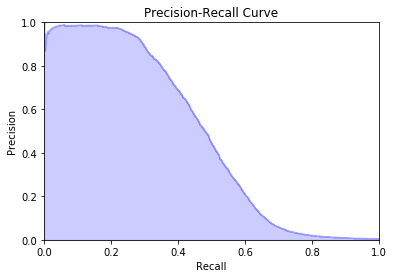

In [31]:
from sklearn.metrics import precision_recall_curve
precision_train, recall_train, _ = precision_recall_curve(ytrain_l, ytrain_score_l)

plt.step(recall_train, precision_train, color='b', alpha=0.2,where='post')
plt.fill_between(recall_train, precision_train, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')

***Receiver Operating Characteristic***

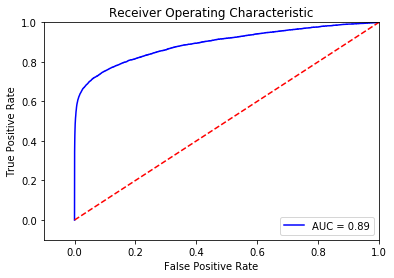

In [32]:
from sklearn.metrics import roc_curve, auc
fpr_train, tpr_train, _ = roc_curve(ytrain_l, ytrain_score_l)
roc_auc = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
performance_data = np.array([['','PP','NP','SS','ACCURACY','PRECISION','RECALL','TNR'],
                             ['Training Set',PP_train,NP_train,SS_train,ACC_train,PPV_train,TPR_train,TNR_train],
                             ['Test Set',PP_test,NP_test,SS_test,ACC_test,PPV_test,TPR_test,TNR_test]])

In [34]:
performance_table = pd.DataFrame(data=performance_data[1:,1:],
                      index=performance_data[1:,0],
                      columns=performance_data[0,1:])

In [35]:

performance_table

,PP,NP,SS,ACCURACY,PRECISION,RECALL,TNR
Training Set,0.004,0.996,1403623,0.997,0.83,0.333,1.0
Test Set,0.004,0.996,155959,0.997,0.801,0.312,1.0


The table above shows that both the training and test datasets are imbalanced with the positive label proportion of 0.004. In Edited Nearest Neighbor (ENN), the majority class is under-sampled by removing points whose class label differs from a majority of its k nearest neighbors. Using k = 3 and k=10, the number of data points decreased slightly from with no improvement to the imbalanced data.The total negative recall (TNR) is 1 due to the high proportion of negative labels in both the training and test data (0.995) sets. The precision (0.83 for training set and 0.801 for test set) and accuracy (0.997 for both training and test sets) are good only because the TNR is very good. This is clearly shown in the low recall values for the training and test sets which are 0.333 and 0.312 respectively. Due to the imbalance in the data (high number of negatives), there is high chance of positive labels being classified as false negatives, reducing the recall score, which is the ratio of true positives to the sum of true positives and false negatives. <br><br> The experiment that shows the effect of imbalanced data on the apparent performance of classifiers is detailed in the notebook **"Effect_of_data_imbalance_experiment_1"** and **"Effect_of_data_imbalance_experiment_2"**.<br><br> This shows the need for balancing the data, through undersampling or oversampling, or use algorithms that are designed to deal with imbalanced data.